In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee_df = pd.read_csv('Employee_outliers.csv')
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,35,Male,Marketing,500000
1,2,Jane,Smith,28,Female,Sales,60000
2,3,Michael,Johnson,42,Male,Finance,70000
3,4,Emily,Williams,31,Female,HR,55000
4,5,James,Brown,37,Male,Operations,65000


In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  100 non-null    int64 
 1   first_name   100 non-null    object
 2   last_name    100 non-null    object
 3   age          100 non-null    int64 
 4   gender       100 non-null    object
 5   department   100 non-null    object
 6   salary       100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


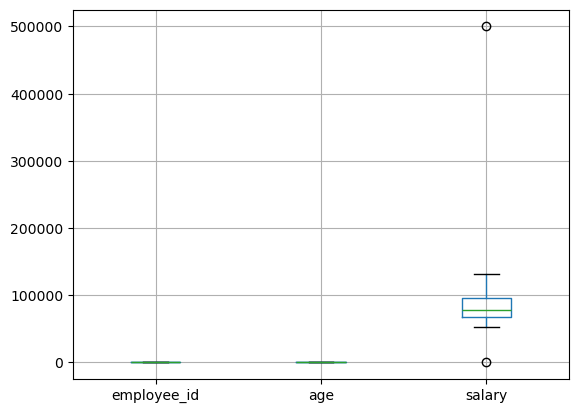

In [4]:
employee_df.boxplot()
plt.show()

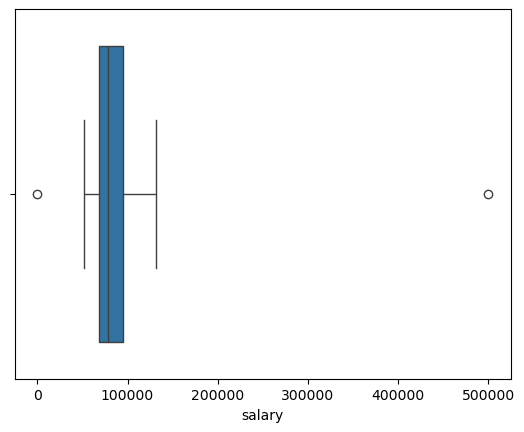

In [5]:
sns.boxplot(employee_df, x='salary')
plt.show()

In [6]:
q1 = employee_df['salary'].quantile(0.25)
q2 = employee_df['salary'].median()
q3 = employee_df['salary'].quantile(0.75)
iqr = q3 - q1
iqr

27000.0

In [7]:
minimum = (q1 - (1.5*iqr))
maximum = (q3 + (1.5*iqr))
maximum

135500.0

In [8]:
cond1 = employee_df['salary'] < minimum
cond2 = employee_df['salary'] > maximum
outliers = employee_df[cond1 | cond2]
outliers

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,35,Male,Marketing,500000
17,18,Sofia,Moore,28,Female,IT,90


In [9]:
employee_df.drop(index=outliers.index, inplace=True)

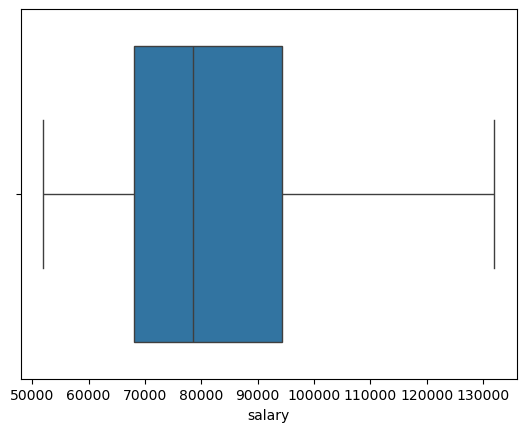

In [10]:
sns.boxplot(employee_df,x='salary')
plt.show()

In [11]:
employee_df = pd.read_csv('Employee_outliers.csv')
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,35,Male,Marketing,500000
1,2,Jane,Smith,28,Female,Sales,60000
2,3,Michael,Johnson,42,Male,Finance,70000
3,4,Emily,Williams,31,Female,HR,55000
4,5,James,Brown,37,Male,Operations,65000


In [12]:
data = employee_df['salary']
data.head()

0    500000
1     60000
2     70000
3     55000
4     65000
Name: salary, dtype: int64

In [13]:
mean = np.nanmean(data.tolist())
std = np.nanstd(data.tolist())
std

46267.20925439527

In [14]:
zscore = (data - mean)/std
zscore.head()

0    8.959674
1   -0.550301
2   -0.334165
3   -0.658369
4   -0.442233
Name: salary, dtype: float64

In [15]:
threshold = 3
data[(abs(zscore) > threshold)]

0    500000
Name: salary, dtype: int64